In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

import seaborn as sns
from pylab import rcParams
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('no-outlier.csv')
data

,Unnamed: 0,Acc_X,Acc_Y,Acc_Z,Class
0,0,2.660984,-9.653030,0.470237,1
1,1,2.223091,-9.432167,2.223091,1
2,2,2.098372,-9.481953,0.926070,1
3,3,2.716461,-9.739352,0.912008,1
4,4,2.288388,-9.371498,0.910390,1
...,...,...,...,...,...
155402,155402,8.701128,4.238336,-0.194529,21
155403,155403,8.680778,4.261679,-0.159214,21
155404,155404,8.756194,4.168306,-0.144251,21
155405,155405,8.662222,4.219781,-0.183755,21


In [3]:
label = LabelEncoder()
data['label'] = label.fit_transform(data['Class'])
data

,Unnamed: 0,Acc_X,Acc_Y,Acc_Z,Class,label
0,0,2.660984,-9.653030,0.470237,1,0
1,1,2.223091,-9.432167,2.223091,1,0
2,2,2.098372,-9.481953,0.926070,1,0
3,3,2.716461,-9.739352,0.912008,1,0
4,4,2.288388,-9.371498,0.910390,1,0
...,...,...,...,...,...,...
155402,155402,8.701128,4.238336,-0.194529,21,20
155403,155403,8.680778,4.261679,-0.159214,21,20
155404,155404,8.756194,4.168306,-0.144251,21,20
155405,155405,8.662222,4.219781,-0.183755,21,20


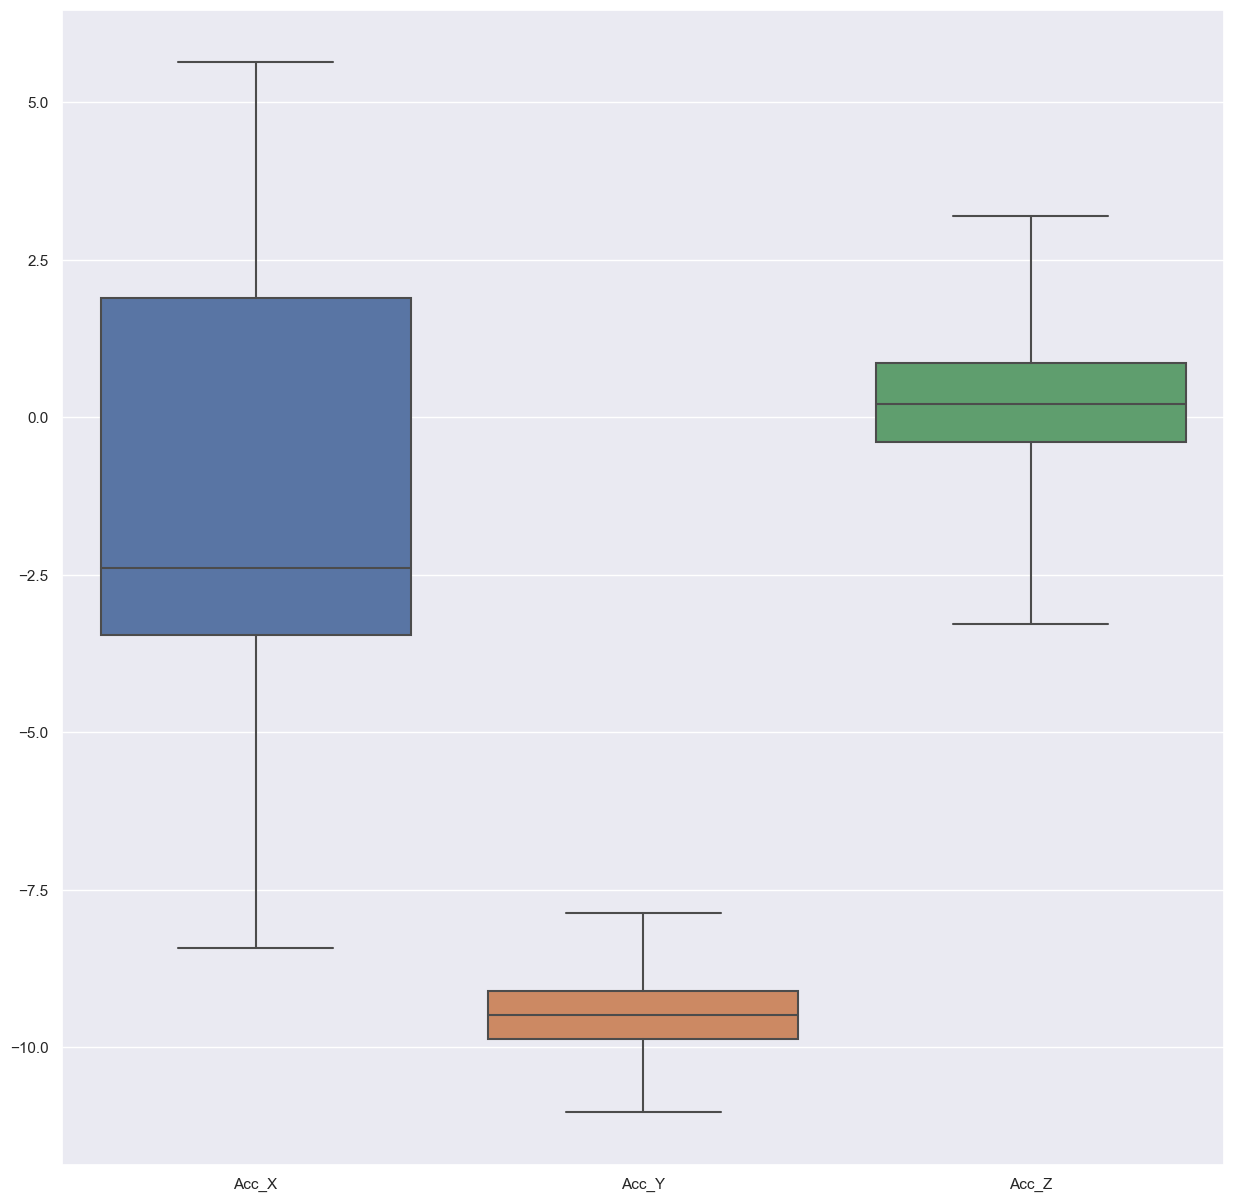

In [4]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(15,15)})
fig=sns.boxplot(data=data.iloc[0:8000,1:4],whis=[0, 100])
count=0

In [7]:
dfn = data.drop('Unnamed: 0', axis=1)  
dfn

,Acc_X,Acc_Y,Acc_Z,Class,label
0,2.660984,-9.653030,0.470237,1,0
1,2.223091,-9.432167,2.223091,1,0
2,2.098372,-9.481953,0.926070,1,0
3,2.716461,-9.739352,0.912008,1,0
4,2.288388,-9.371498,0.910390,1,0
...,...,...,...,...,...
155402,8.701128,4.238336,-0.194529,21,20
155403,8.680778,4.261679,-0.159214,21,20
155404,8.756194,4.168306,-0.144251,21,20
155405,8.662222,4.219781,-0.183755,21,20


In [8]:
label.classes_

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21], dtype=int64)

In [9]:
X = dfn[['Acc_X', 'Acc_Y', 'Acc_Z']]
y = dfn['label']

In [10]:
X

,Acc_X,Acc_Y,Acc_Z
0,2.660984,-9.653030,0.470237
1,2.223091,-9.432167,2.223091
2,2.098372,-9.481953,0.926070
3,2.716461,-9.739352,0.912008
4,2.288388,-9.371498,0.910390
...,...,...,...
155402,8.701128,4.238336,-0.194529
155403,8.680778,4.261679,-0.159214
155404,8.756194,4.168306,-0.144251
155405,8.662222,4.219781,-0.183755


In [11]:
y

0          0
1          0
2          0
3          0
4          0
          ..
155402    20
155403    20
155404    20
155405    20
155406    20
Name: label, Length: 155407, dtype: int64

In [12]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['Acc_X', 'Acc_Y', 'Acc_Z'])
scaled_X['mag'] = np.sqrt(scaled_X['Acc_X'] ** 2 + scaled_X['Acc_Y'] ** 2 + scaled_X['Acc_Z'] ** 2)
scaled_X['label'] = y.values

scaled_X.head()

,Acc_X,Acc_Y,Acc_Z,mag,label
0,0.985481,-0.807007,-0.491449,1.365267,0
1,0.865844,-0.763546,-0.059973,1.155978,0
2,0.831769,-0.773343,-0.379243,1.197382,0
3,1.000638,-0.823993,-0.382704,1.351556,0
4,0.883684,-0.751608,-0.383103,1.221712,0


In [13]:
scaled_X = scaled_X.drop(['Acc_X', 'Acc_Y', 'Acc_Z'], axis=1)


In [14]:
scaled_X

,mag,label
0,1.365267,0
1,1.155978,0
2,1.197382,0
3,1.351556,0
4,1.221712,0
...,...,...
155402,3.329777,20
155403,3.326341,20
155404,3.331364,20
155405,3.318731,20


In [15]:
import scipy.stats as stats


In [108]:
Fs = 20
frame_size = Fs * 20
hop_size = Fs * 5
frames = []
labels = []

for i in range(0, len(scaled_X) - frame_size, hop_size):
    x = scaled_X['mag'].values[i: i + frame_size]
    label = stats.mode(scaled_X['label'][i: i + frame_size])[0][0]
    frames.append([x])
    labels.append(label)

C:\Users\Acer Nitro 5\AppData\Local\Temp\ipykernel_7304\4114532512.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(scaled_X['label'][i: i + frame_size])[0][0]


In [ ]:
frames

In [ ]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,


In [111]:
frames = np.asarray(frames).reshape(-1, frame_size)
labels = np.asarray(labels)

In [112]:
print("RESHAPE SHAPE: ",frames.shape)
print("LABELS: ",labels[0])
print("LABELS: ",labels.shape)

RESHAPE SHAPE:  (1551, 400)
LABELS:  0
LABELS:  (1551,)


In [113]:
x=frames
y=labels

In [114]:
from sklearn.model_selection import train_test_split


In [115]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=123, stratify=y)


In [116]:
training_files=[x_train, y_train]
subject_files=[x_test, y_test]

In [117]:
class ProgressMeter(object):
    def __init__(self, num_batches, *meters, prefix=""):
        self.batch_fmtstr = self._get_batch_fmtstr(num_batches)
        self.meters = meters
        self.prefix = prefix

    def print(self, batch):
        entries = [self.prefix + self.batch_fmtstr.format(batch)]
        entries += [str(meter) for meter in self.meters]
        print('\t'.join(entries))

    def _get_batch_fmtstr(self, num_batches):
        num_digits = len(str(num_batches // 1))
        fmt = '{:' + str(num_digits) + 'd}'
        return '[' + fmt + '/' + fmt.format(num_batches) + ']'


In [118]:
import torch
from torch.utils.data import Dataset


class LoadDataset_from_numpy(Dataset):
    def __init__(self, np_data):
        super(LoadDataset_from_numpy, self).__init__()
        X_train = np_data[0]
        y_train = np_data[1]
        self.len = X_train.shape[0]
        self.x_data = torch.from_numpy(X_train).float()
        self.y_data = torch.from_numpy(y_train).long()
        self.x_data = self.x_data.view(self.x_data.size()[0], 1, self.x_data.size()[1])

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len


def data_generator_np(training_files, subject_files, batch_size):
    train_dataset = LoadDataset_from_numpy(training_files)
    test_dataset = LoadDataset_from_numpy(subject_files)

    train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                               batch_size=batch_size,
                                               shuffle=True,
                                               drop_last=True,
                                               num_workers=0)

    test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                              batch_size=batch_size,
                                              shuffle=False,
                                              drop_last=True,
                                              num_workers=0)

    return train_loader, test_loader

In [153]:
train_loader, test_loader = data_generator_np(training_files, subject_files, 128)


In [154]:
import torch.nn as nn
from torch.nn import functional as f

"""
2.1  Signal Segments Representation

Signal Segment Definition: class SignalSegmentDefinition(nn.Module)
Signal Segment Representation: class SignalSegmentRepresentation(nn.Module)

2.2 Relationship Learning

2.2.1 Global Node Attention: class GNA(nn.Module):

***
(1) Signal Segment Definition -> (2) Signal Segment Representation -> (3) Global Node Attention
"""


class SignalSegmentDefinition(nn.Module):
    """
   (1) Signal Segment Definition

    input size: B, 1, 1, L
    output size: B, K, 1, D
    """
    def __init__(self, kernel_size, stride):
        super().__init__()
        self.kernel_size = kernel_size
        self.stride = stride

    def forward(self, x):
        b = f.unfold(x, kernel_size=self.kernel_size, stride=self.stride)  # overlapping sliding window
        b = b.permute(0, 2, 1)
        b = b.unsqueeze(-2)
        return b


class SignalSegmentRepresentation(nn.Module):
    """
    (2) Signal Segment Representation

    input arg:
    segment_size: a single signal segment size
    overlapping_rate: sliding window overlapping rate
    segment_num: number of the signal segments

    input size:  B, 1, 1, L
    output size: B, K, 1, C
    """
    def __init__(self, segment_size, overlapping_rate, segment_num):
        super(SignalSegmentRepresentation, self).__init__()
        self.overlapping = int(segment_size - segment_size * overlapping_rate)
        self.segment = SignalSegmentDefinition((1, segment_size), self.overlapping)
        self.segment2vec = SignalSegment2Vec(30)
        self.gna = GNA(segment_num)

    def forward(self, x):
        signal_segments = []
        x = self.segment(x)
        x = x.squeeze()
        "share the SignalSegment2Vec Encoder"
        for idx in range(x.size()[1]):
            data = x[:, idx, :]
            data = data.unsqueeze(1)
            out = self.segment2vec(data)
            out = out.view(x.size()[0], 1, -1)
            signal_segments.append(out)
        signal_segments = torch.cat(signal_segments, dim=1)
        signal_segments = signal_segments .unsqueeze(2)
        "global node attention"
        signal_segments = self.gna(signal_segments).permute(0, 2, 1, 3)
        return signal_segments


class GNA(nn.Module):
    """
    (3) Global Node Attention

    input arg:
    channel: number of the signal segments

    input size: B, K, 1, C
    output size: B, K, 1, C
    """
    def __init__(self, channel, reduction=2):
        super(GNA, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Conv2d(channel, channel // reduction, 1, bias=False),
            nn.GELU(),
            nn.Conv2d(channel // reduction, channel, 1, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        y = self.avg_pool(x)
        y = self.fc(y)
        return x * y.expand_as(x)


class SignalSegment2Vec(nn.Module):
    """
    SignalSegment2Vec Encoder module in Signal Segment Representation

    input size:  B, K, 1, D
    output size: B, K, 1, C
    """
    def __init__(self, afr_reduced_cnn_size):
        super(SignalSegment2Vec, self).__init__()
        self.features = nn.Sequential(
            nn.Conv1d(1, 64, kernel_size=49, stride=6, bias=False, padding=int(49//2)),
            nn.BatchNorm1d(64),
            nn.GELU(),
            nn.MaxPool1d(kernel_size=7, stride=4, padding=int(7//2)),

            nn.Conv1d(64, 128, kernel_size=7, stride=1, bias=False, padding=int(7//2)),
            nn.BatchNorm1d(128),
            nn.GELU(),

            nn.Conv1d(128, 128, kernel_size=7, stride=1, bias=False, padding=int(7//2)),
            nn.BatchNorm1d(128),
            nn.GELU(),

            nn.MaxPool1d(kernel_size=3, stride=4, padding=int(3//2)),
        )

        self.inplanes = 128
        self.AFR = self._make_layer(ResBasicBlock, afr_reduced_cnn_size, 1)

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv1d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm1d(planes * block.expansion),
            )
        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.features(x)
        x = self.AFR(x)
        return x


"""
"Residual Squeeze-and-Excitation(SE) Block"
"""


class ResLayer(nn.Module):
    def __init__(self, channel, reduction=2):
        super(ResLayer, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Sequential(
            nn.Linear(channel, channel // reduction, bias=False),
            nn.GELU(),
            nn.Linear(channel // reduction, channel, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _ = x.size()
        y = self.avg_pool(x).view(b, c)
        y = self.fc(y).view(b, c, 1)
        return x * y.expand_as(x)


class ResBasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None, reduction=4):
        super(ResBasicBlock, self).__init__()
        self.conv1 = nn.Conv1d(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm1d(planes)
        self.relu = nn.GELU()
        self.conv2 = nn.Conv1d(planes, planes, 1)
        self.bn2 = nn.BatchNorm1d(planes)
        self.reslayer = ResLayer(planes, reduction)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.reslayer(out)
        if self.downsample is not None:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out

In [155]:
"""
2.2 Relationship Learning

2.2.2 Graph-based Self Attention

graph attention: class Attention(nn.Module)
convolution-based multi-head attention: class Block(nn.Module)
"""


class Attention(nn.Module):
    """
    Graph Attention (see Eq.4)

    input arg:
    channel: number of the signal segments
    input size:  B, M, K, C
    output size: B, M, K, C
    """
    def __init__(self, channel, reduction=2):
        super().__init__()
        self.attn = nn.Sequential(
            nn.AdaptiveAvgPool2d((None, 1)),
            nn.Conv2d(channel, channel // reduction, 1, bias=False),
            nn.GELU(),
            nn.Conv2d(channel // reduction, channel, 1, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        B, M, K, _ = x.size()
        adj = self.pearson(x)  # adjacency matrix
        x_ = self._prepare_attentional_mechanism_input(x)
        e = self.attn(x_)
        e = e.permute(0, 2, 1, 3).contiguous()
        e = e.view(B, M, K, K)
        zero_vec_adj = -9e15 * torch.ones_like(adj)
        attention = torch.where(adj > 0, e, zero_vec_adj)
        attention = f.softmax(attention, dim=-1)
        x = torch.matmul(attention, x)
        return x, adj

    def h_matmul(self, x):
        N = x.size()[-2]
        x_repeated_in_chunks = x.repeat_interleave(N, dim=-2)
        x_repeated_alternating = x.repeat(1, 1, N, 1)
        result = torch.mul(x_repeated_in_chunks, x_repeated_alternating)
        return result

    def pearson(self, x):
        "Pearson Correlation"
        centered_h = x - x.mean(dim=-1, keepdim=True)
        covariance = self.h_matmul(centered_h).sum(dim=-1, keepdim=True)
        bessel_corrected_covariance = torch.div(covariance, (x.shape[-1] - 1))
        std_h = x.std(dim=-1, keepdim=True)
        p = torch.div(bessel_corrected_covariance, (self.h_matmul(std_h)))
        p = p.view(x.size()[0], x.size()[1], x.size()[2], -1)
        return p

    def _prepare_attentional_mechanism_input(self, x):
        "concatenation operation (see Eq.4) with positional encoding"
        B, _, K, _ = x.size()
        x_repeated_in_chunks = x.repeat_interleave(K, dim=-2)
        x_repeated_alternating = x.repeat(1, 1, K, 1)

        "positional encoding"
        pos = 2 * torch.ones_like(x_repeated_alternating)
        one_vec = torch.ones_like(x_repeated_alternating)
        x_repeated_in_chunks.eq(x_repeated_alternating)
        pos = torch.where(x_repeated_in_chunks.eq(x_repeated_alternating) > 0, one_vec, pos)
        x_repeated_alternating = pos * x_repeated_alternating

        all_combinations_matrix = torch.cat([x_repeated_in_chunks, x_repeated_alternating], dim=-1)
        all_combinations_matrix = all_combinations_matrix.permute(0, 2, 1, 3)
        return all_combinations_matrix


class Block(nn.Module):
    """
    Multi-Head Attention (see Fig.2)

    input arg:
    node_size: number of the signal segments
    input_size: Q in Fig. 2
    multi_heads: number of heads

    input size: B, J, K, C    J=1 when H=1
    output size: B, M'', K, C''


    """
    def __init__(self, node_size, input_size, kernel_size, stride, multi_heads):
        super().__init__()

        expand = 1

        padding = kernel_size//2
        self.mid_channels_ = (multi_heads - kernel_size + 2 * padding) // stride + 1

        self.multi_head = nn.Sequential(
            nn.Conv2d(input_size, multi_heads, 1, bias=False),
            nn.Conv2d(multi_heads, multi_heads, 1, bias=False)
        )

        self.feature_extraction = nn.Sequential(
            nn.Conv2d(node_size, node_size, kernel_size=kernel_size, stride=stride, padding=padding,
                      groups=node_size, bias=False),
            nn.BatchNorm2d(node_size),
            nn.GELU()
        )

        self.attn = Attention(node_size * node_size)

        self.feed_forward = nn.Sequential(
            nn.Conv2d(self.mid_channels_, self.mid_channels_ * 4, 1, bias=False),
            nn.BatchNorm2d(self.mid_channels_ * 4),
            nn.GELU(),
            nn.Conv2d(self.mid_channels_ * 4, multi_heads * expand, 1, bias=False),
            nn.BatchNorm2d(multi_heads)
        )

        self.shortcut = nn.Sequential(
            nn.Conv2d(node_size, node_size, kernel_size=kernel_size, stride=stride, padding=padding, bias=False),
            nn.BatchNorm2d(node_size),
            nn.AdaptiveAvgPool2d((1, None))
        )

        self.norm = nn.BatchNorm2d(multi_heads)

    def forward(self, x):
        res = x.permute(0, 2, 1, 3)                 # B, J, K, C -> B, K, J, C
        "Dense layers"
        out = self.multi_head(x)                    # B, J, K, C -> B, M, K, C, where M is the number of heads
        out, adj = self.attn(out)
        self.adj = adj                              # for visualization
        out = f.gelu(self.norm(out))
        out = out.permute(0, 2, 1, 3)               # B, M, K, C -> B, K, M, C
        "Attention Layers"
        out = self.feature_extraction(out)          # B, K, M, C -> B, K, M', C'
        out = out.permute(0, 2, 1, 3)               # B, K, M', C' -> B, M', K, C'
        out = self.feed_forward(out)                # B, M', K, C' -> B, M'', K, C''
        shortcut = self.shortcut(res)               # B, K, J, C -> B, 1, K, C''
        shortcut = shortcut.permute(0, 2, 1, 3)
        out += shortcut                             # (B, M'', K, C'') + (B, 1, K, C'') -> (B, M'', K, C'') Broadcast
        return out


In [156]:
import torch.nn.functional as F


In [157]:
class GRAPHSENSOR(nn.Module):
    """
    GRAPHSENSOR main()

    input arg:
    segment_size: a single signal segment size
    overlapping_rate: sliding window overlapping rate
    in_channels: number of the signal segments
    class_num: class number

    input size: B, 1, L
    output size: B, class_num

    """

    def __init__(self, segment_size, overlapping_rate, in_channels, class_num):
        super(GRAPHSENSOR, self).__init__()
        self.segment_size = segment_size
        self.signal_segments = SignalSegmentRepresentation(segment_size, overlapping_rate, in_channels)
        """
        The encoder is composed of a stack of H=4 identical layers
        Multi-head number: 16 -> 32 -> 64 -> 128
        """
        self.attn = nn.Sequential(
            Block(in_channels, 1,   5, 2, 16),
            Block(in_channels, 16,  5, 2, 32),
            Block(in_channels, 32,  5, 1, 64),
            Block(in_channels, 64,  5, 1, 128),
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels * 128, 512, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.GELU()
        )
        self.avgpool = nn.AdaptiveAvgPool2d((None, 1))
        self.conv3 = nn.Sequential(
            nn.Conv2d(512, 1024, 1, bias=False),
            nn.BatchNorm2d(1024),
            nn.GELU()
        )
        self.conv4 = nn.Conv2d(1024, class_num, 1, bias=False)

    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.signal_segments(x)
        x = self.attn(x)
        x = self.avgpool(x)
        x = x.flatten(1).unsqueeze(-1).unsqueeze(-1)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = x.flatten(1)
        return F.log_softmax(x, dim=-1)

In [158]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [159]:
model = GRAPHSENSOR(segment_size=80, overlapping_rate=0.5, in_channels=9, class_num=21).to(device)

In [160]:
def count_parameters(model):
        return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameter')

The model has 1,561,768 trainable parameter


In [161]:
if torch.cuda.device_count() >= 1:
        print("num GPUs: ", torch.cuda.device_count())
        model = nn.DataParallel(model).to(device)

num GPUs:  1


In [162]:
best_acc = 0
best_f1 = 0

In [163]:
import os
import argparse
import time
import random
import torch.optim as optim

In [164]:
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001, amsgrad=True)
criterion = nn.CrossEntropyLoss().to(device)

In [165]:
start_time = time.time()

In [166]:
def adjust_learning_rate(optimizer, epoch, args):
    """Sets the learning rate to the initial LR decayed by 10 every 30 epochs"""
    if epoch == 10:
        for param_group in optimizer.param_groups:
            param_group['lr'] = 0.001


In [168]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self, name, fmt=':f'):
        self.name = name
        self.fmt = fmt
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

    def __str__(self):
        fmtstr = '{name} {val' + self.fmt + '} ({avg' + self.fmt + '})'
        return fmtstr.format(**self.__dict__)


In [169]:
def accuracy_(output, target):
    with torch.no_grad():
        pred = torch.argmax(output, dim=1)
        assert pred.shape[0] == len(target)
        correct = 0
        correct += torch.sum(pred == target).item()
        return correct * 100 / len(target)


def f1_(output, target):
    with torch.no_grad():
        pred = torch.argmax(output, dim=1)
        assert pred.shape[0] == len(target)
    return f1_score(pred.cpu().numpy(), target.data.cpu().numpy(), average='macro')


In [170]:
def train(train_loader, model, criterion, optimizer, epoch, print_interval):
    batch_time = AverageMeter('Time', ':6.3f')
    data_time = AverageMeter('Data', ':6.3f')
    losses = AverageMeter('Loss', ':.4e')
    accuracy = AverageMeter('accuracy', ':.4e')
    f1_score = AverageMeter('f1_score', ':.4e')

    # switch to train mode
    model.train()

    end = time.time()
    for i, (data, target) in enumerate(train_loader):
        # measure data loading time
        data_time.update(time.time() - end)
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        losses.update(loss.item(), data.size(0))
        acc = accuracy_(output, target)
        f1 = f1_(output, target) * 100
        accuracy.update(acc, data.size(0))
        f1_score.update(f1, data.size(0))

        loss.backward()
        optimizer.step()

        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()

        if i % print_interval == 0:
            print('Epoch: [{0}][{1}/{2}]\t'
                  'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
                  'accuracy {accuracy.val:.3f} ({accuracy.avg:.3f})\t'
                  'f1_score {f1_score.val:.3f} ({f1_score.avg:.3f})'.format(
                epoch, i, len(train_loader), loss=losses, accuracy=accuracy, f1_score=f1_score))


In [171]:
def validate(val_loader, model, criterion, args):
    batch_time = AverageMeter('Time', ':6.3f')
    losses = AverageMeter('Loss', ':.4e')
    accuracy = AverageMeter('accuracy', ':.4e')
    f1_score = AverageMeter('f1_score ', ':.4e')
    progress = ProgressMeter(len(val_loader), losses, accuracy, f1_score,
                             prefix='Test: ')

    # switch to evaluate mode
    model.eval()
    with torch.no_grad():
        end = time.time()
        for i, (data, target) in enumerate(val_loader):
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)

            losses.update(loss.item(), data.size(0))
            acc = accuracy_(output, target)
            f1 = f1_(output, target) * 100
            accuracy.update(acc, data.size(0))
            f1_score.update(f1, data.size(0))

            # measure elapsed time
            batch_time.update(time.time() - end)
            end = time.time()

            # TODO: this should also be done with the ProgressMeter
        print(' Test: accuracy {accuracy.avg:.3f} f1_score {f1_score.avg:.3f}'
              .format(accuracy=accuracy, f1_score=f1_score))

        return accuracy.avg, f1_score.avg


In [172]:
epochs=251

In [173]:
for epoch in range(epochs):
    print("\nStart of epoch NO: %d" % (epoch,))
    adjust_learning_rate(optimizer, epoch, args=1)
    train(train_loader, model, criterion,  optimizer, epoch, print_interval=5)
    acc, f1 = validate(test_loader, model, criterion,  args=1)
    
    is_best = acc > best_acc
    best_acc = max(acc, best_acc)
            
    time_interval = time.time() - start_time
    time_split = time.gmtime(time_interval)
    print("Training time: ", time_interval, "Hour: ", time_split.tm_hour, "Minute: ", time_split.tm_min, "Second: ",
              time_split.tm_sec, end='')
    print(" Test best accuracy:", best_acc, " Test best f1 score:", best_f1)  


Start of epoch NO: 0
Epoch: [0][0/9]	Loss 3.1866 (3.1866)	accuracy 5.469 (5.469)	f1_score 3.296 (3.296)
Epoch: [0][5/9]	Loss 2.2169 (2.5941)	accuracy 23.438 (19.010)	f1_score 16.893 (12.406)
 Test: accuracy 5.469 f1_score 2.030
Training time:  48.8658983707428 Hour:  0 Minute:  0 Second:  48 Test best accuracy: 5.46875  Test best f1 score: 0

Start of epoch NO: 1
Epoch: [1][0/9]	Loss 2.2374 (2.2374)	accuracy 25.000 (25.000)	f1_score 15.556 (15.556)
Epoch: [1][5/9]	Loss 2.0201 (2.1727)	accuracy 31.250 (25.391)	f1_score 25.079 (18.903)
 Test: accuracy 6.250 f1_score 2.359
Training time:  51.32432532310486 Hour:  0 Minute:  0 Second:  51 Test best accuracy: 6.25  Test best f1 score: 0

Start of epoch NO: 2
Epoch: [2][0/9]	Loss 2.0165 (2.0165)	accuracy 28.125 (28.125)	f1_score 19.717 (19.717)
Epoch: [2][5/9]	Loss 1.9871 (2.0540)	accuracy 35.156 (29.688)	f1_score 24.656 (21.197)
 Test: accuracy 8.203 f1_score 1.558
Training time:  53.78873014450073 Hour:  0 Minute:  0 Second:  53 Test best

Epoch: [23][5/9]	Loss 0.8997 (0.7730)	accuracy 60.938 (68.620)	f1_score 58.586 (65.178)
 Test: accuracy 28.516 f1_score 23.185
Training time:  106.95466208457947 Hour:  0 Minute:  1 Second:  46 Test best accuracy: 62.5  Test best f1 score: 0

Start of epoch NO: 24
Epoch: [24][0/9]	Loss 0.7718 (0.7718)	accuracy 69.531 (69.531)	f1_score 67.267 (67.267)
Epoch: [24][5/9]	Loss 0.8319 (0.7066)	accuracy 67.969 (73.438)	f1_score 65.661 (71.222)
 Test: accuracy 30.469 f1_score 24.898
Training time:  109.4503026008606 Hour:  0 Minute:  1 Second:  49 Test best accuracy: 62.5  Test best f1 score: 0

Start of epoch NO: 25
Epoch: [25][0/9]	Loss 0.6071 (0.6071)	accuracy 75.000 (75.000)	f1_score 68.209 (68.209)
Epoch: [25][5/9]	Loss 0.6715 (0.7003)	accuracy 77.344 (73.828)	f1_score 75.935 (71.545)
 Test: accuracy 32.422 f1_score 24.374
Training time:  111.96739506721497 Hour:  0 Minute:  1 Second:  51 Test best accuracy: 62.5  Test best f1 score: 0

Start of epoch NO: 26
Epoch: [26][0/9]	Loss 0.8031 (

Epoch: [46][5/9]	Loss 0.4106 (0.5487)	accuracy 83.594 (77.734)	f1_score 81.341 (77.540)
 Test: accuracy 64.453 f1_score 61.933
Training time:  164.87279152870178 Hour:  0 Minute:  2 Second:  44 Test best accuracy: 67.96875  Test best f1 score: 0

Start of epoch NO: 47
Epoch: [47][0/9]	Loss 0.5643 (0.5643)	accuracy 78.125 (78.125)	f1_score 82.332 (82.332)
Epoch: [47][5/9]	Loss 0.5732 (0.5442)	accuracy 77.344 (79.167)	f1_score 79.921 (77.013)
 Test: accuracy 59.375 f1_score 55.282
Training time:  167.39903831481934 Hour:  0 Minute:  2 Second:  47 Test best accuracy: 67.96875  Test best f1 score: 0

Start of epoch NO: 48
Epoch: [48][0/9]	Loss 0.3999 (0.3999)	accuracy 82.812 (82.812)	f1_score 80.023 (80.023)
Epoch: [48][5/9]	Loss 0.4488 (0.4384)	accuracy 82.812 (83.464)	f1_score 81.507 (81.375)
 Test: accuracy 49.219 f1_score 43.290
Training time:  169.92527985572815 Hour:  0 Minute:  2 Second:  49 Test best accuracy: 67.96875  Test best f1 score: 0

Start of epoch NO: 49
Epoch: [49][0/9]	

Epoch: [69][5/9]	Loss 0.4623 (0.4184)	accuracy 82.812 (83.854)	f1_score 79.141 (82.184)
 Test: accuracy 41.016 f1_score 37.535
Training time:  223.3404529094696 Hour:  0 Minute:  3 Second:  43 Test best accuracy: 69.921875  Test best f1 score: 0

Start of epoch NO: 70
Epoch: [70][0/9]	Loss 0.3394 (0.3394)	accuracy 89.062 (89.062)	f1_score 89.446 (89.446)
Epoch: [70][5/9]	Loss 0.5728 (0.4015)	accuracy 75.781 (84.896)	f1_score 71.636 (84.134)
 Test: accuracy 52.344 f1_score 48.440
Training time:  225.89536142349243 Hour:  0 Minute:  3 Second:  45 Test best accuracy: 69.921875  Test best f1 score: 0

Start of epoch NO: 71
Epoch: [71][0/9]	Loss 0.4005 (0.4005)	accuracy 85.156 (85.156)	f1_score 85.234 (85.234)
Epoch: [71][5/9]	Loss 0.4169 (0.4755)	accuracy 83.594 (83.073)	f1_score 77.585 (80.507)
 Test: accuracy 54.688 f1_score 50.152
Training time:  228.44753623008728 Hour:  0 Minute:  3 Second:  48 Test best accuracy: 69.921875  Test best f1 score: 0

Start of epoch NO: 72
Epoch: [72][0/9

Epoch: [92][5/9]	Loss 0.3750 (0.3562)	accuracy 88.281 (87.240)	f1_score 89.103 (86.072)
 Test: accuracy 59.766 f1_score 55.146
Training time:  282.12093138694763 Hour:  0 Minute:  4 Second:  42 Test best accuracy: 72.65625  Test best f1 score: 0

Start of epoch NO: 93
Epoch: [93][0/9]	Loss 0.2161 (0.2161)	accuracy 93.750 (93.750)	f1_score 91.626 (91.626)
Epoch: [93][5/9]	Loss 0.2723 (0.2796)	accuracy 88.281 (89.714)	f1_score 89.322 (88.947)
 Test: accuracy 55.469 f1_score 48.812
Training time:  284.6799952983856 Hour:  0 Minute:  4 Second:  44 Test best accuracy: 72.65625  Test best f1 score: 0

Start of epoch NO: 94
Epoch: [94][0/9]	Loss 0.2858 (0.2858)	accuracy 91.406 (91.406)	f1_score 91.310 (91.310)
Epoch: [94][5/9]	Loss 0.3573 (0.2797)	accuracy 85.938 (89.323)	f1_score 86.837 (88.883)
 Test: accuracy 21.875 f1_score 15.924
Training time:  287.2471582889557 Hour:  0 Minute:  4 Second:  47 Test best accuracy: 72.65625  Test best f1 score: 0

Start of epoch NO: 95
Epoch: [95][0/9]	Lo

Epoch: [115][5/9]	Loss 0.1910 (0.1991)	accuracy 90.625 (92.057)	f1_score 89.282 (91.135)
 Test: accuracy 60.156 f1_score 56.180
Training time:  341.0547299385071 Hour:  0 Minute:  5 Second:  41 Test best accuracy: 72.65625  Test best f1 score: 0

Start of epoch NO: 116
Epoch: [116][0/9]	Loss 0.2170 (0.2170)	accuracy 92.969 (92.969)	f1_score 92.277 (92.277)
Epoch: [116][5/9]	Loss 0.1691 (0.1709)	accuracy 92.188 (94.141)	f1_score 91.949 (93.668)
 Test: accuracy 51.562 f1_score 44.593
Training time:  343.60989236831665 Hour:  0 Minute:  5 Second:  43 Test best accuracy: 72.65625  Test best f1 score: 0

Start of epoch NO: 117
Epoch: [117][0/9]	Loss 0.1517 (0.1517)	accuracy 94.531 (94.531)	f1_score 93.472 (93.472)
Epoch: [117][5/9]	Loss 0.2450 (0.2063)	accuracy 92.188 (92.578)	f1_score 92.582 (91.400)
 Test: accuracy 42.969 f1_score 36.150
Training time:  346.1620657444 Hour:  0 Minute:  5 Second:  46 Test best accuracy: 72.65625  Test best f1 score: 0

Start of epoch NO: 118
Epoch: [118][0

Epoch: [138][5/9]	Loss 0.3001 (0.1794)	accuracy 89.062 (93.490)	f1_score 87.069 (92.434)
 Test: accuracy 49.609 f1_score 44.470
Training time:  399.89108514785767 Hour:  0 Minute:  6 Second:  39 Test best accuracy: 72.65625  Test best f1 score: 0

Start of epoch NO: 139
Epoch: [139][0/9]	Loss 0.1235 (0.1235)	accuracy 94.531 (94.531)	f1_score 95.029 (95.029)
Epoch: [139][5/9]	Loss 0.1930 (0.2073)	accuracy 93.750 (91.016)	f1_score 94.346 (91.213)
 Test: accuracy 43.359 f1_score 37.125
Training time:  402.46431851387024 Hour:  0 Minute:  6 Second:  42 Test best accuracy: 72.65625  Test best f1 score: 0

Start of epoch NO: 140
Epoch: [140][0/9]	Loss 0.1208 (0.1208)	accuracy 93.750 (93.750)	f1_score 92.324 (92.324)
Epoch: [140][5/9]	Loss 0.3253 (0.1961)	accuracy 89.062 (92.448)	f1_score 88.076 (91.813)
 Test: accuracy 68.359 f1_score 67.233
Training time:  405.02347350120544 Hour:  0 Minute:  6 Second:  45 Test best accuracy: 72.65625  Test best f1 score: 0

Start of epoch NO: 141
Epoch: [1

Epoch: [161][5/9]	Loss 0.1544 (0.1235)	accuracy 93.750 (95.573)	f1_score 94.085 (95.918)
 Test: accuracy 64.453 f1_score 61.017
Training time:  459.4150803089142 Hour:  0 Minute:  7 Second:  39 Test best accuracy: 74.609375  Test best f1 score: 0

Start of epoch NO: 162
Epoch: [162][0/9]	Loss 0.1259 (0.1259)	accuracy 96.094 (96.094)	f1_score 96.047 (96.047)
Epoch: [162][5/9]	Loss 0.1743 (0.1274)	accuracy 91.406 (95.052)	f1_score 92.493 (95.194)
 Test: accuracy 64.453 f1_score 60.226
Training time:  462.0052237510681 Hour:  0 Minute:  7 Second:  42 Test best accuracy: 74.609375  Test best f1 score: 0

Start of epoch NO: 163
Epoch: [163][0/9]	Loss 0.0856 (0.0856)	accuracy 99.219 (99.219)	f1_score 99.134 (99.134)
Epoch: [163][5/9]	Loss 0.1566 (0.1156)	accuracy 94.531 (96.745)	f1_score 93.664 (96.593)
 Test: accuracy 64.844 f1_score 59.648
Training time:  464.6025159358978 Hour:  0 Minute:  7 Second:  44 Test best accuracy: 74.609375  Test best f1 score: 0

Start of epoch NO: 164
Epoch: [1

Epoch: [184][5/9]	Loss 0.2938 (0.2170)	accuracy 88.281 (91.536)	f1_score 89.739 (91.022)
 Test: accuracy 60.547 f1_score 57.161
Training time:  519.3565919399261 Hour:  0 Minute:  8 Second:  39 Test best accuracy: 74.609375  Test best f1 score: 0

Start of epoch NO: 185
Epoch: [185][0/9]	Loss 0.1472 (0.1472)	accuracy 94.531 (94.531)	f1_score 89.687 (89.687)
Epoch: [185][5/9]	Loss 0.1845 (0.1909)	accuracy 92.188 (93.359)	f1_score 89.732 (91.775)
 Test: accuracy 62.109 f1_score 60.281
Training time:  521.9673686027527 Hour:  0 Minute:  8 Second:  41 Test best accuracy: 74.609375  Test best f1 score: 0

Start of epoch NO: 186
Epoch: [186][0/9]	Loss 0.1204 (0.1204)	accuracy 94.531 (94.531)	f1_score 94.719 (94.719)
Epoch: [186][5/9]	Loss 0.1441 (0.1545)	accuracy 95.312 (93.490)	f1_score 96.093 (93.837)
 Test: accuracy 48.828 f1_score 44.153
Training time:  524.5584502220154 Hour:  0 Minute:  8 Second:  44 Test best accuracy: 74.609375  Test best f1 score: 0

Start of epoch NO: 187
Epoch: [1

Epoch: [207][5/9]	Loss 0.1614 (0.1597)	accuracy 92.188 (93.229)	f1_score 89.422 (92.935)
 Test: accuracy 60.938 f1_score 60.110
Training time:  580.2798676490784 Hour:  0 Minute:  9 Second:  40 Test best accuracy: 74.609375  Test best f1 score: 0

Start of epoch NO: 208
Epoch: [208][0/9]	Loss 0.0905 (0.0905)	accuracy 96.875 (96.875)	f1_score 96.313 (96.313)
Epoch: [208][5/9]	Loss 0.0879 (0.1153)	accuracy 96.875 (95.443)	f1_score 96.856 (94.651)
 Test: accuracy 67.969 f1_score 65.409
Training time:  582.8759574890137 Hour:  0 Minute:  9 Second:  42 Test best accuracy: 74.609375  Test best f1 score: 0

Start of epoch NO: 209
Epoch: [209][0/9]	Loss 0.1399 (0.1399)	accuracy 95.312 (95.312)	f1_score 94.461 (94.461)
Epoch: [209][5/9]	Loss 0.3117 (0.1513)	accuracy 84.375 (93.880)	f1_score 86.457 (93.198)
 Test: accuracy 63.281 f1_score 57.908
Training time:  585.471962928772 Hour:  0 Minute:  9 Second:  45 Test best accuracy: 74.609375  Test best f1 score: 0

Start of epoch NO: 210
Epoch: [21

Epoch: [230][5/9]	Loss 0.1260 (0.0844)	accuracy 96.094 (97.135)	f1_score 94.529 (96.697)
 Test: accuracy 68.750 f1_score 67.152
Training time:  640.0110812187195 Hour:  0 Minute:  10 Second:  40 Test best accuracy: 75.0  Test best f1 score: 0

Start of epoch NO: 231
Epoch: [231][0/9]	Loss 0.0570 (0.0570)	accuracy 98.438 (98.438)	f1_score 98.606 (98.606)
Epoch: [231][5/9]	Loss 0.0418 (0.0684)	accuracy 98.438 (97.786)	f1_score 97.821 (97.560)
 Test: accuracy 67.188 f1_score 64.747
Training time:  642.5985219478607 Hour:  0 Minute:  10 Second:  42 Test best accuracy: 75.0  Test best f1 score: 0

Start of epoch NO: 232
Epoch: [232][0/9]	Loss 0.0943 (0.0943)	accuracy 96.875 (96.875)	f1_score 95.085 (95.085)
Epoch: [232][5/9]	Loss 0.0557 (0.0685)	accuracy 97.656 (97.135)	f1_score 97.451 (96.792)
 Test: accuracy 53.516 f1_score 49.040
Training time:  645.1825771331787 Hour:  0 Minute:  10 Second:  45 Test best accuracy: 75.0  Test best f1 score: 0

Start of epoch NO: 233
Epoch: [233][0/9]	Los